# Importing the Libraries

In [2]:
import tensorflow as tf

Tensorflow is deep learning library developed by Google. <br>
Pytorch is another popular deep learning library developed by Facebook(Meta)

In [3]:
tf.__version__

'2.2.0'

In [4]:
from keras.preprocessing.image import ImageDataGenerator

Keras is deep learning library that provides python interface to artificial neural networks

ImageDataGenerator is class in the submodule image which is used for data preprocessing

# Data Preprocessing

Applying transformation to the training dataset to prevent overfitting(Image Augmentation)

Image Augmentation is a technique of applying different transformation to the original image <br>
which results in multiple transformed copies of the same image.Each image is a bit different <br>
in certain aspects due to the transfomation applied.


Image Augmentation increases the size of the dataset and prevents overfitting.

ImageDataGenerator provides real time augmentation while the model is still training.

Assume training set has 10 images and batch size is 5.<br>
Number of steps in each epoch is 2.<br>
Assume Number of epochs is 2.<br>
In 1st epoch 10 augmented images are created and 5 of them will be trained in Step 1 and another 5 in step 2.<br>
In 2nd epoch another 10 augmented images are created and process is repeated.<br>


In each epoch,the ImageDataGenerator applies a transformation on the images and the transformed images<br>                   for training the model. The transformations can include flips, shifts,brightness ,rotation, zooming, etc.<br>
Thus new data is being created(data augmentation).Obviously the generated images are not completely different<br>              from the original ones.<br>

Steps_per_epoch argument of fit method should be n_samples / batch_size, where n_samples is the total number      
of training data you have (i.e. 8000 in this case). This way in each epoch, each training sample is augmented only one <br>   time and therefore 8000 transformed images will be generated in each epoch.

Augmentation means using a different transformation of each image  in each epoch <br>
hence, if the model is trained for, say, 5 epochs, we have used 5 different versions<br>
of each original image in training (or 8000 * 5 = 40000 different images in the whole training,<br>
instead of using just the 8000 original images in thewhole training). 

In [5]:
training_set_data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

rescale is used for standardization :divides the value of pixel by 255.<br>
shear range,zoom range and horizontal flip are used for geometrical transformations

In [6]:
training_set=training_set_data_generator.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=32,class_mode="binary")

Found 8000 images belonging to 2 classes.


250 batches will be created due to batch size of 32.

In [109]:
print(training_set[0][0].shape)
print(training_set[1][0].shape)
print(training_set[249][0].shape)

(32, 64, 64, 3)
(32, 64, 64, 3)
(32, 64, 64, 3)


In [101]:
training_set[0][0].ndim

4

In [85]:
training_set[0][0][0].shape

(64, 64, 3)

There are 2 subdirectories in training_set. Each directory represents a particular class.<br>
Target size (height,widht): Images will be resized to reduce computation time.<br>
Class mode -> binary : Two categories are present.

In [7]:
testing_set_data_generator=ImageDataGenerator(rescale=1./255)

In [8]:
testing_set=testing_set_data_generator.flow_from_directory('dataset/test_set',target_size=(64,64),batch_size=32,class_mode="binary")

Found 2000 images belonging to 2 classes.


Transformations will be not applied to testing set.

Other methods in ImageDataGenerator class:<br>
    apply_tranform (x,transform parameters) : x is 3D tensor (single image)<br>
    flow<br>
    flow_from_dataframe

# Building the CNN

In [9]:
cnn=tf.keras.models.Sequential()

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=1,activation='relu',input_shape=[64,64,3]))

filters:No of feature detectors <br>
kernel size: dimension of feature detectors


In [11]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))


Adding the second Convolutional Layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=1,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))


Pooling is important for identification of images irrespective of orientation,position,brightness,constrast etc.<br>
Property of spatial invariance.<br>

For a pool_size 2 using Max Pooling the maximum vakue is taken from each 2*2 grid.<br>
Pooling thus discards irrelevant information and prevents overfitting.

Images are usually non-linear.On using convolution there is a risk of loosing non-linearity and thus rectifier function is used to add non-linearty.

In [14]:
cnn.add(tf.keras.layers.Flatten())

Flattening to 1D vector form

# Full Connection

In [15]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

units is the number of hidden neurons

# Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

sigmoid activation function reduces the output value in range of 0 to 1.

# Training the CNN

In [17]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [18]:
cnn.fit(training_set, epochs=16, validation_data=testing_set,steps_per_epoch=250,validation_steps=62)

Epoch 1/16
250/250 [==============================] - 83s 332ms/step - loss: 0.6554 - accuracy: 0.6030 - val_loss: 0.6374 - val_accuracy: 0.6442
Epoch 2/16
250/250 [==============================] - 90s 359ms/step - loss: 0.5882 - accuracy: 0.6869 - val_loss: 0.5838 - val_accuracy: 0.6895
Epoch 3/16
250/250 [==============================] - 81s 323ms/step - loss: 0.5491 - accuracy: 0.7175 - val_loss: 0.5125 - val_accuracy: 0.7591
Epoch 4/16
250/250 [==============================] - 85s 339ms/step - loss: 0.5263 - accuracy: 0.7327 - val_loss: 0.5122 - val_accuracy: 0.7545
Epoch 5/16
250/250 [==============================] - 94s 375ms/step - loss: 0.4995 - accuracy: 0.7620 - val_loss: 0.5297 - val_accuracy: 0.7404
Epoch 6/16
250/250 [==============================] - 104s 416ms/step - loss: 0.4804 - accuracy: 0.7626 - val_loss: 0.4843 - val_accuracy: 0.7732
Epoch 7/16
250/250 [==============================] - 98s 394ms/step - loss: 0.4633 - accuracy: 0.7779 - val_loss: 0.4676 - val_a

steps_per_epoch needs to mentioned due to using data augmentation while training the model.

# Single Prediction

In [186]:
import numpy as np
from keras.preprocessing import image
test_image_1=image.load_img('dataset/single_prediction/Classify_01.jpg',target_size=(64,64))

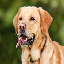

In [187]:
test_image_1

In [188]:
test_image_2=image.load_img('dataset/single_prediction/Classify_02.jpg',target_size=(64,64))

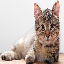

In [189]:
test_image_2

In [190]:
test_image_1=image.img_to_array(test_image_1)
test_image_1.shape

(64, 64, 3)

In [191]:
test_image_2=image.img_to_array(test_image_2)
test_image_2.shape

(64, 64, 3)

In [192]:
test_image_1

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 129.,  65.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,  11.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [231., 201., 173.]],

       [[ 50.,  57.,  13.],
        [ 42.,  50.,  11.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 163.],
        [236., 206., 178.],
        [234., 203., 175.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [193]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [195]:
test_image_1.ndim

3

During preprocessing the model was trained on batches of 32 images and thus there is an extra dimension corresponding to the batch<br>
Thus when we predict on a single image the extra dimension has to be added(using expand_dims)

In [196]:
def prediction(test_image):
    test_image=test_image/255.0
    test_image=np.expand_dims(test_image,axis=0)
    result=cnn.predict(test_image)
    if result[0][0]>=0.5:
        print("Dog")
    else:
        print("Cat")

In [197]:
prediction(test_image_1)

Dog


In [198]:
prediction(test_image_2)

Cat
